# The Impact of Policies on the Growth Rate of COVID-19 
### Hongyan Meng

### Description
As COVID-19 is spreading throughout the globe, countries took actions to cope with this pandemic. Due to the fact that the stringency of the policies of every country varies, the effect of controlling the COVID-19 is different. This research project focuses on how a country’s reaction and policy decision affect the trend of spreading of COVID-19.


### Datasets
Global COVID-19 daily reports
link :https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

COVID-19 policy tracker
link: https://github.com/OxCGRT/covid-policy-tracker

### Hypothesis
Stringent policies are more effective in controlling the growth rate of COVID-19

### Summary
A cartopy map indicating the current confirmed cases around the globe.

Plot the growth rate curves for every country and examine how the tendency of the curves changes over time.

Determine the policy timelines for different countries and mark them on the growth rate curves to evaluate the effect of such policies


## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

display.set_matplotlib_formats('retina')
%matplotlib inline

In [2]:
# import the data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url, index_col='Country/Region')
df.head()

Province/State       Lat       Long  1/22/20  1/23/20  1/24/20  \
Country/Region                                                                  
Afghanistan               NaN  33.93911  67.709953        0        0        0   
Albania                   NaN  41.15330  20.168300        0        0        0   
Algeria                   NaN  28.03390   1.659600        0        0        0   
Andorra                   NaN  42.50630   1.521800        0        0        0   
Angola                    NaN -11.20270  17.873900        0        0        0   

                1/25/20  1/26/20  1/27/20  1/28/20  ...  12/1/20  12/2/20  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...    46516    46718   
Albania               0        0        0        0  ...    39014    39719   
Algeria               0        0        0        0  ...    84152    85084   
Andorra               0        0        0        0  ...     6790     6842   
Angola                0        0        0        0  ...    15251    15319   

                12/3/20  12/4/20  12/5/20  12/6/20  12/7/20  12/8/20  12/9/20  \
Country/Region                                                                  
Afghanistan       46837    46837    47072    47306    47516    47716    47851   
Albania           40501    41302    42148    42988    43683    44436    45188   
Algeria           85927    86730    87502    88252    88825    89416    90014   
Andorra            6904     6955     7005     7050     7084     7127     7162   
Angola            15361    15493    15536    15591    15648    15729    15804   

                12/10/20  
Country/Region            
Afghanistan        48053  
Albania            46061  
Algeria            90579  
Andorra             7190  
Angola             15925  

[5 rows x 327 columns]

## The Spreading of COVID-19

In [3]:
import cartopy 
import cartopy.crs as ccrs  

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


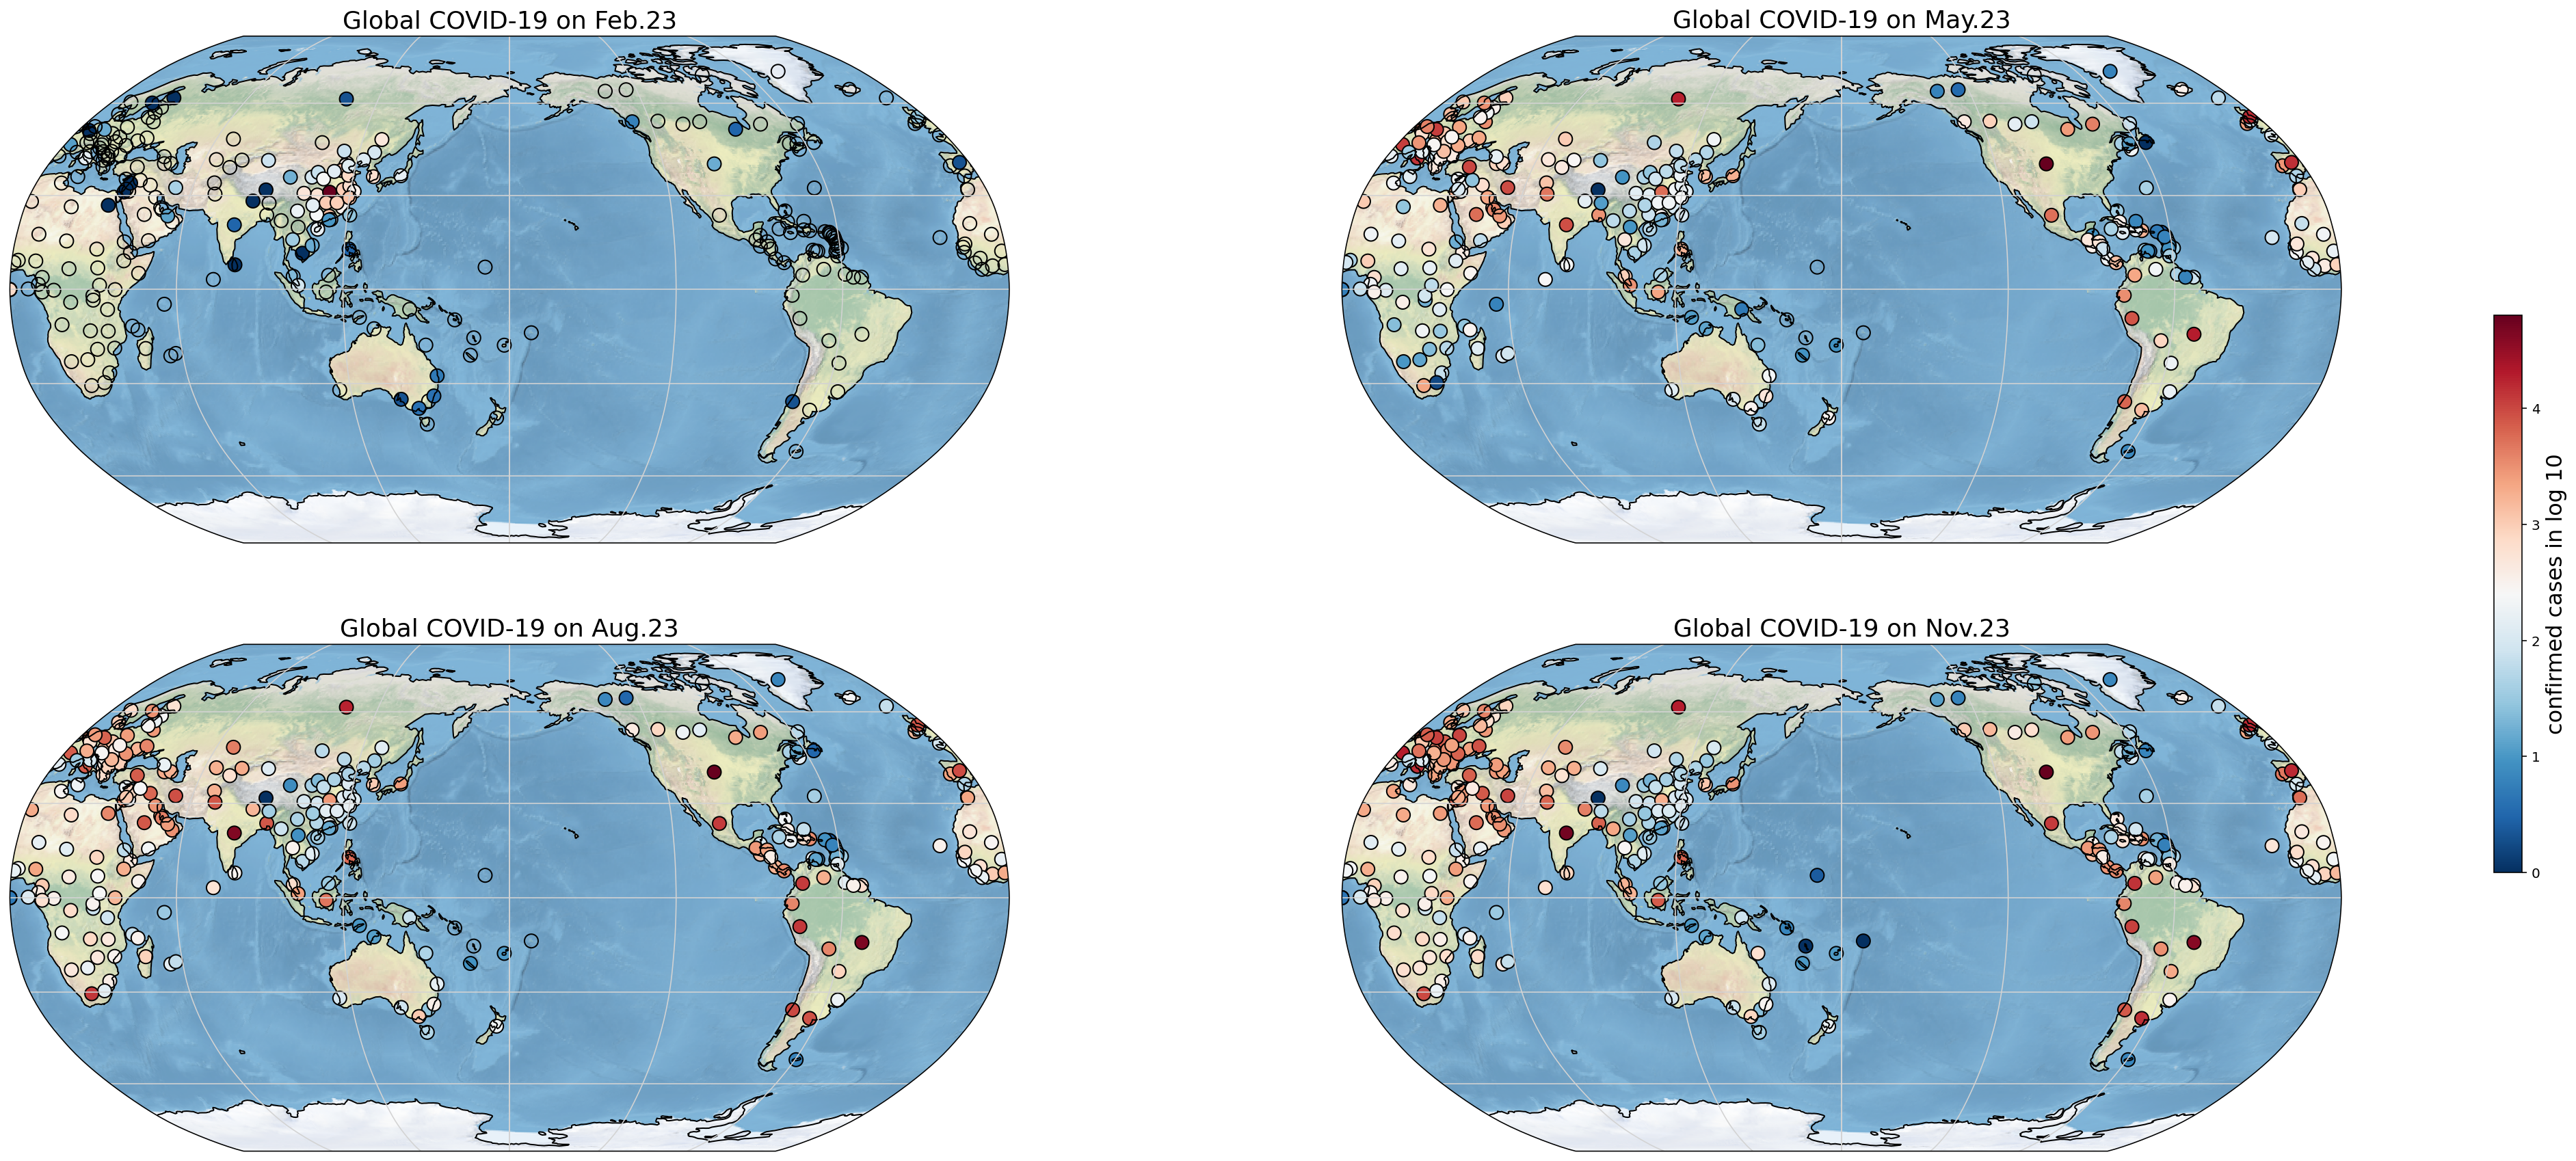

In [4]:
# the spreading of COVID-19 on map (time interval = 3 months)

fig, ax = plt.subplots(ncols=2, nrows =2, subplot_kw={'projection': ccrs.Robinson(central_longitude = 180)}, figsize = (40,15))

ax[0,0].stock_img()
ax[0,0].coastlines(resolution='auto', color='k')
ax[0,0].gridlines(color='lightgrey', linestyle='-',)
ax[0,0].set_title('Global COVID-19 on Feb.23',fontsize=18)
a = ax[0,0].scatter(x = df.Long, y = df.Lat, c = np.log10(df['2/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

ax[0,1].stock_img()
ax[0,1].coastlines(resolution='auto', color='k')
ax[0,1].gridlines(color='lightgrey', linestyle='-',)
ax[0,1].set_title('Global COVID-19 on May.23',fontsize=18)
b = ax[0,1].scatter(x = df.Long, y = df.Lat, c = np.log10(df['5/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())


ax[1,0].stock_img()
ax[1,0].coastlines(resolution='auto', color='k')
ax[1,0].set_title('Global COVID-19 on Aug.23',fontsize=18)
ax[1,0].gridlines(color='lightgrey', linestyle='-',)
c = ax[1,0].scatter(x = df.Long, y = df.Lat, c = np.log10(df['8/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

ax[1,1].stock_img()
ax[1,1].coastlines(resolution='auto', color='k')
ax[1,1].set_title('Global COVID-19 on Nov.23',fontsize=18)
ax[1,1].gridlines(color='lightgrey', linestyle='-',)
d = ax[1,1].scatter(x = df.Long, y = df.Lat, c = np.log10(df['11/23/20']),
        s = 100, cmap = 'RdBu_r',edgecolor = 'black',
        transform = ccrs.PlateCarree())

cbar = plt.colorbar(a, ax=ax, shrink = 0.5)
cbar.set_label('confirmed cases in log 10', fontsize=16)

The spread of the COVID-19 started spreading from Asia to Europe and Americas first, then Africa.

In [5]:
#combine all the data for a country
df_country = df.groupby('Country/Region').sum()
df_country.head(5)

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  12/1/20  12/2/20  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...    46516    46718   
Albania               0        0        0        0  ...    39014    39719   
Algeria               0        0        0        0  ...    84152    85084   
Andorra               0        0        0        0  ...     6790     6842   
Angola                0        0        0        0  ...    15251    15319   

                12/3/20  12/4/20  12/5/20  12/6/20  12/7/20  12/8/20  12/9/20  \
Country/Region                                                                  
Afghanistan       46837    46837    47072    47306    47516    47716    47851   
Albania           40501    41302    42148    42988    43683    44436    45188   
Algeria           85927    86730    87502    88252    88825    89416    90014   
Andorra            6904     6955     7005     7050     7084     7127     7162   
Angola            15361    15493    15536    15591    15648    15729    15804   

                12/10/20  
Country/Region            
Afghanistan        48053  
Albania            46061  
Algeria            90579  
Andorra             7190  
Angola             15925  

[5 rows x 326 columns]

In [6]:
# drop the location data
df_slice = df_country.iloc[:,2:310]

(0.0, 12500000.0)

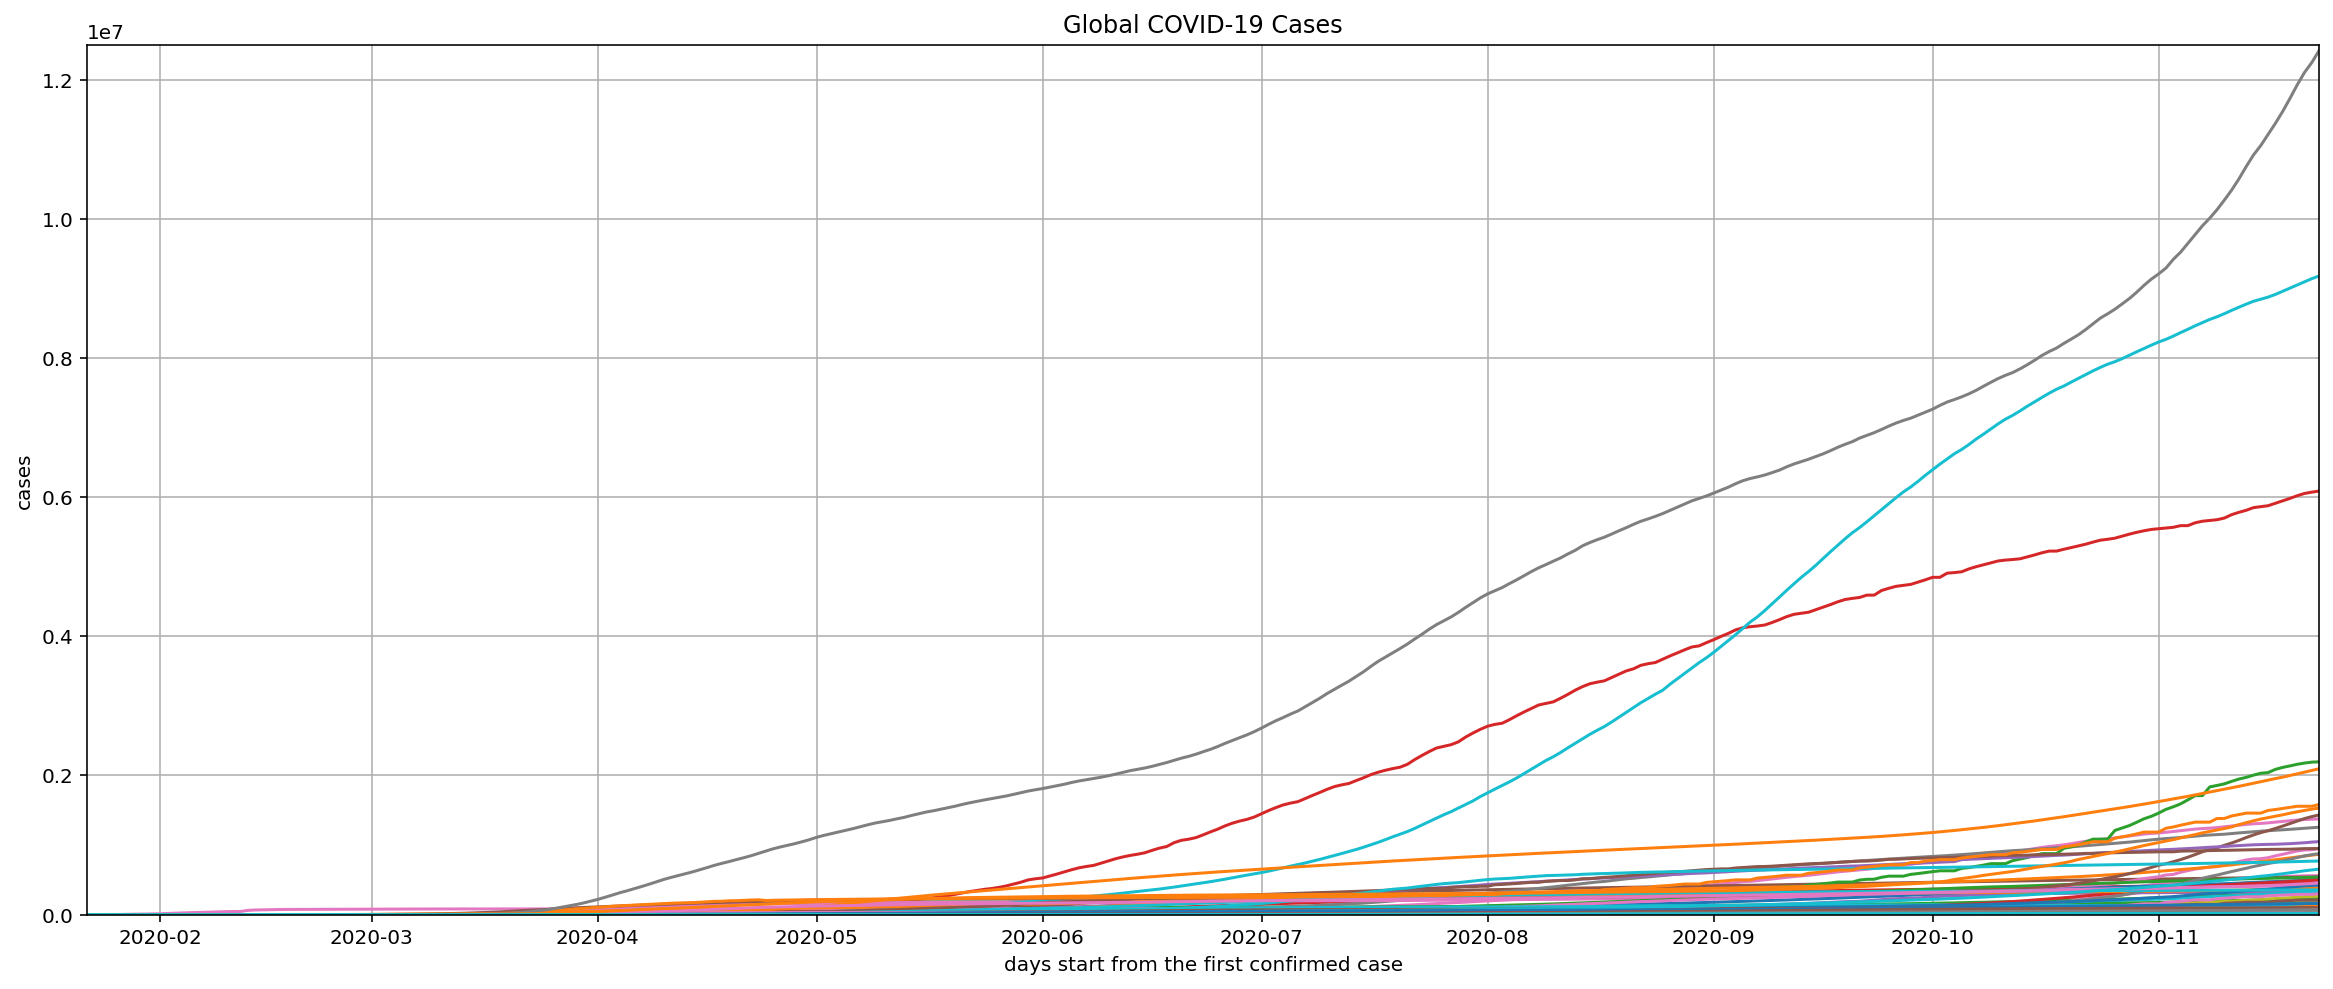

In [7]:
import datetime as datetime

plt.subplots(figsize=(20,8))

#plot the data with date

#extract the date
rows = []
date = []
for row in df_slice:
    rows.append(row)
for date_dt in rows:
    date_dt = datetime.datetime.strptime(date_dt ,'%m/%d/%y')
    date.append(date_dt)
    
    
for i in range(0,190):
    case=[]
    row= df_slice.iloc[i,:]   #extract the data of every country
    for cnt in row:
        case.append(cnt)
    plt.plot(date,case)
    
plt.xlabel('days start from the first confirmed case')
plt.ylabel('cases')
plt.title('Global COVID-19 Cases')
plt.grid()
plt.xlim(datetime.date(2020, 1, 22), datetime.date(2020,11,23))
plt.ylim(0,12500000)

Three countries stood out in this pandemic and the epidemic was worsen in many coutries during the past few months.

## Policies Taken by Countries

In [8]:
## import the policy data
url2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest_responses.csv'
df_policy = pd.read_csv(url2,parse_dates=[2,3]) 
df_policy.rename(columns = {'CountryName':'Country/Region'}, inplace = True)
df_policy.head(10)

Country/Region CountryCode  StartDate    EndDate  \
0          Aruba         ABW 2020-03-10 2020-06-24   
1          Aruba         ABW 2020-03-16 2020-05-17   
2          Aruba         ABW 2020-03-17 2020-06-09   
3          Aruba         ABW 2020-03-18        NaT   
4          Aruba         ABW 2020-03-19        NaT   
5          Aruba         ABW 2020-03-21 2020-03-28   
6          Aruba         ABW 2020-03-21 2020-03-28   
7          Aruba         ABW 2020-03-29 2020-05-03   
8          Aruba         ABW 2020-03-29 2020-09-10   
9          Aruba         ABW 2020-03-29 2020-05-17   

                          PolicyType  PolicyValue  Flag  \
0                 H2: Testing policy          1.0   NaN   
1                 C1: School closing          3.0   1.0   
2  C8: International travel controls          4.0   NaN   
3   H1: Public information campaigns          2.0   1.0   
4                H3: Contact tracing          1.0   NaN   
5              C2: Workplace closing          2.0   1.0   
6      C6: Stay at home requirements          1.0   1.0   
7              C2: Workplace closing          3.0   1.0   
8           C3: Cancel public events          2.0   1.0   
9     C4: Restrictions on gatherings          4.0   1.0   

                                         InitialNote  
0  March 10, 2020 – According to a statement by A...  
1  Schools are closed starting Monday, March 16 t...  
2  Two days after the government of Aruba confirm...  
3  "ORANJESTAD – In connection with the COVID-19 ...  
4  Contact tracing was noted a few times in the d...  
5  "ORANJESTAD - The Police Department of Aruba h...  
6  Mandatory curfew between 9pm and 6am everyday ...  
7  Starting March 29, 2020, a Shelter in Place is...  
8  Starting March 29, 2020, a Shelter in Place is...  
9  Starting March 29, 2020, a Shelter in Place is...

In [9]:
# the earliest date to take action
df_earl =  df_policy.groupby('Country/Region').first()

In [10]:

# no confirmed cases

days=[]
for b in range(0,191):
    row=df_slice.iloc[b,:]   #extract the data of every country
    a = 0
    for cnt in row:
        if cnt < 1:
            a = a + 1
    days.append(a)
pd.to_timedelta(days, unit ='d')
orig_time = datetime.datetime.strptime('01/22/20', '%m/%d/%y')
confirmed_time = orig_time+pd.to_timedelta(days, unit ='d')
confirmed_time

DatetimeIndex(['2020-02-24', '2020-03-09', '2020-02-25', '2020-03-02',
               '2020-03-20', '2020-03-13', '2020-03-03', '2020-03-01',
               '2020-01-26', '2020-02-25',
               ...
               '2020-01-31', '2020-03-13', '2020-03-15', '2020-11-10',
               '2020-03-14', '2020-01-23', '2020-03-05', '2020-04-10',
               '2020-03-18', '2020-03-20'],
              dtype='datetime64[ns]', length=191, freq=None)

In [11]:
# add the 
df_slice.loc[:,'confirmed_time'] = confirmed_time
df_confirmed = df_slice
df_confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
Vietnam                   0        2        2        2        2        2   
West Bank and Gaza        0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  11/16/20  \
Country/Region                                          ...             
Afghanistan               0        0        0        0  ...     43468   
Albania                   0        0        0        0  ...     28432   
Algeria                   0        0        0        0  ...     68589   
Andorra                   0        0        0        0  ...      5914   
Angola                    0        0        0        0  ...     13615   
...                     ...      ...      ...      ...  ...       ...   
Vietnam                   2        2        2        2  ...      1283   
West Bank and Gaza        0        0        0        0  ...     63867   
Yemen                     0        0        0        0  ...      2078   
Zambia                    0        0        0        0  ...     17187   
Zimbabwe                  0        0        0        0  ...      8897   

                    11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  \
Country/Region                                                         
Afghanistan            43681     43924     44177     44363     44503   
Albania                29126     29837     30623     31459     32196   
Algeria                69591     70629     71652     72755     73774   
Andorra                 5951      6018      6066      6142      6207   
Angola                 13818     13922     14134     14267     14413   
...                      ...       ...       ...       ...       ...   
Vietnam                 1288      1300      1304      1305      1306   
West Bank and Gaza     64935     66186     67296     68768     70254   
Yemen                   2081      2083      2086      2090      2093   
Zambia                 17243     17280     17350     17373     17394   
Zimbabwe                8945      8981      9046      9120      9172   

                    11/22/20  11/23/20  11/24/20  confirmed_time  
Country/Region                                                    
Afghanistan            44706     44988     45174      2020-02-24  
Albania                32761     33556     34300      2020-03-09  
Algeria                74862     75867     77000      2020-02-25  
Andorra                 6256      6304      6351      2020-03-02  
Angola                 14493     14634     14742      2020-03-20  
...                      ...       ...       ...             ...  
Vietnam                 1307      1312      1316      2020-01-23  
West Bank and Gaza     71644     73196     75007      2020-03-05  
Yemen                   2099      2107      2114      2020-04-10  
Zambia                 17424     17454     17466      2020-03-18  
Zimbabwe                9220      9308      9398      2020-03-20  

[191 rows x 309 columns]

In [12]:
#drop useless columns
df_new = df_confirmed.drop(df_confirmed.iloc[:,0:306], axis = 1) 
df_new.head(5)

11/23/20  11/24/20 confirmed_time
Country/Region                                   
Afghanistan        44988     45174     2020-02-24
Albania            33556     34300     2020-03-09
Algeria            75867     77000     2020-02-25
Andorra             6304      6351     2020-03-02
Angola             14634     14742     2020-03-20

In [13]:
# combine the confirmed cases data with the policy data
df_merged = pd.merge(df_new, df_earl,on='Country/Region')
df_merged.head(5)

11/23/20  11/24/20 confirmed_time CountryCode  StartDate  \
Country/Region                                                             
Afghanistan        44988     45174     2020-02-24         AFG 2020-02-23   
Albania            33556     34300     2020-03-09         ALB 2020-02-14   
Algeria            75867     77000     2020-02-25         DZA 2020-03-05   
Andorra             6304      6351     2020-03-02         AND 2020-03-02   
Angola             14634     14742     2020-03-20         AGO 2020-02-06   

                  EndDate                         PolicyType  PolicyValue  \
Country/Region                                                              
Afghanistan    2020-06-08  C8: International travel controls          3.0   
Albania        2020-03-09   H1: Public information campaigns          1.0   
Algeria        2020-04-13   H1: Public information campaigns          1.0   
Andorra        2020-04-17                 H2: Testing policy          1.0   
Angola         2020-02-29  C8: International travel controls          2.0   

                Flag                                        InitialNote  
Country/Region                                                           
Afghanistan      0.0  Afghanistan bans all passenger movement (inclu...  
Albania          1.0  First information about coronavirus put out on...  
Algeria          1.0  "Health authorities have been calling on citiz...  
Andorra          1.0  'A 20 year-old man with mild symptoms who was ...  
Angola           1.0  https://web.archive.org/web/20200323164000/htt...

In [14]:
# figure out the time that every country took to react to this pandemic
duration = df_merged['EndDate'] - df_merged['StartDate']
react_time = df_merged['StartDate']- df_merged['confirmed_time']
print(react_time)

df_merged.loc[:,'react_time'] = react_time
df_merged.loc[:,'duration'] = duration

Country/Region
Afghanistan    -1 days
Albania       -24 days
Algeria         9 days
Andorra         0 days
Angola        -43 days
                ...   
Venezuela     -33 days
Vietnam         2 days
Yemen         -26 days
Zambia        -26 days
Zimbabwe      -53 days
Length: 161, dtype: timedelta64[ns]


In [15]:
#locate the earliest responses
df_merged.nsmallest(10,'react_time')

#Take Tajikistan, Botswana, Uganda and Indonesia as examples

11/23/20  11/24/20 confirmed_time CountryCode  StartDate  \
Country/Region                                                              
Solomon Islands        16        17     2020-10-12         SLB 2020-02-06   
Vanuatu                 1         1     2020-11-10         VUT 2020-03-26   
Tajikistan          11932     11971     2020-04-30         TJK 2020-01-21   
Lesotho              2086      2092     2020-05-13         LSO 2020-03-04   
Botswana             9992      9992     2020-03-30         BWA 2020-01-24   
Brunei                149       150     2020-03-09         BRN 2020-01-06   
Uganda              18165     18406     2020-03-21         UGA 2020-01-20   
Mongolia              672       699     2020-03-10         MNG 2020-01-10   
Burundi               664       673     2020-03-31         BDI 2020-02-01   
Indonesia          502110    506302     2020-03-02         IDN 2020-01-03   

                   EndDate                         PolicyType  PolicyValue  \
Country/Region                                                               
Solomon Islands 2020-07-27  C8: International travel controls          3.0   
Vanuatu         2020-05-17                 C1: School closing          3.0   
Tajikistan      2020-03-17   H1: Public information campaigns          1.0   
Lesotho         2020-03-18   H1: Public information campaigns          1.0   
Botswana        2020-03-15   H1: Public information campaigns          2.0   
Brunei          2020-03-23   H1: Public information campaigns          2.0   
Uganda          2020-02-05  C8: International travel controls          1.0   
Mongolia        2020-01-21               H6: Facial Coverings          1.0   
Burundi         2020-03-21   H1: Public information campaigns          1.0   
Indonesia       2020-01-28   H1: Public information campaigns          1.0   

                 Flag                                        InitialNote  \
Country/Region                                                             
Solomon Islands   1.0  Travelers from countries with confirmed 2019-n...   
Vanuatu           1.0  https://web.archive.org/web/20200611220024/htt...   
Tajikistan        1.0  The Tajik Ministry of Health sent a letter to ...   
Lesotho           1.0  The ministry however reassured that it will co...   
Botswana          1.0  Social media and gov communication providing i...   
Brunei            1.0  The Ministry of Health has a website with all ...   
Uganda            1.0  screenings start at Entebbe airport https://ww...   
Mongolia          1.0  On January 10, we issued our first public advi...   
Burundi           1.0  First advisory (communiqué) was issued with me...   
Indonesia         1.0  The Health Ministry has has had a travel advis...   

                react_time duration  
Country/Region                       
Solomon Islands  -249 days 172 days  
Vanuatu          -229 days  52 days  
Tajikistan       -100 days  56 days  
Lesotho           -70 days  14 days  
Botswana          -66 days  51 days  
Brunei            -63 days  77 days  
Uganda            -61 days  16 days  
Mongolia          -60 days  11 days  
Burundi           -59 days  49 days  
Indonesia         -59 days  25 days

In [16]:
df_merged.nlargest(10,'react_time')
#Take Chile, Belarus, Algeria and Senegal as examples

11/23/20  11/24/20 confirmed_time CountryCode  StartDate  \
Country/Region                                                             
Cambodia             306       307     2020-01-27         KHM 2020-03-07   
Thailand            3922      3926     2020-01-22         THA 2020-03-02   
Comoros              596       607     2020-04-30         COM 2020-05-22   
Chile             542080    543087     2020-02-23         CHL 2020-03-14   
Belarus           125482    126953     2020-02-28         BLR 2020-03-14   
Algeria            75867     77000     2020-02-25         DZA 2020-03-05   
Senegal            15897     15908     2020-03-02         SEN 2020-03-06   
Estonia             9956     10159     2020-02-27         EST 2020-03-01   
Jordan            188410    192996     2020-03-03         JOR 2020-03-05   
Vietnam             1312      1316     2020-01-23         VNM 2020-01-25   

                  EndDate                         PolicyType  PolicyValue  \
Country/Region                                                              
Cambodia       2020-09-06                 C1: School closing          3.0   
Thailand       2020-04-30                 H2: Testing policy          1.0   
Comoros        2020-08-06               H6: Facial Coverings          2.0   
Chile          2020-06-30   H1: Public information campaigns          2.0   
Belarus        2020-04-02  C8: International travel controls          3.0   
Algeria        2020-04-13   H1: Public information campaigns          1.0   
Senegal        2020-04-10                 H2: Testing policy          1.0   
Estonia        2020-05-31                 E1: Income support          2.0   
Jordan         2020-03-08   H1: Public information campaigns          2.0   
Vietnam        2020-01-29  C8: International travel controls          1.0   

                Flag                                        InitialNote  \
Country/Region                                                            
Cambodia         1.0  https://web.archive.org/web/20200729160421/htt...   
Thailand         1.0  Thailand's Department of Disease Control annou...   
Comoros          1.0  Face masks are compulsory in markets starting ...   
Chile            1.0  Ministry of health announces COVID response ha...   
Belarus          1.0  Flights to and from affected countries have be...   
Algeria          1.0  "Health authorities have been calling on citiz...   
Senegal          1.0  Ministry of health daily updats only reported ...   
Estonia          0.0  The Estonian Unemployment Insurance Fund will ...   
Jordan           1.0  On March 5, abriefing noted that a free hotlin...   
Vietnam          0.0  Announced on Jan 23: "To prevent the epidemics...   

               react_time duration  
Country/Region                      
Cambodia          40 days 183 days  
Thailand          40 days  59 days  
Comoros           22 days  76 days  
Chile             20 days 108 days  
Belarus           15 days  19 days  
Algeria            9 days  39 days  
Senegal            4 days  35 days  
Estonia            3 days  91 days  
Jordan             2 days   3 days  
Vietnam            2 days   4 days

## The Effect of Reaction Time

Text(0, 0.5, 'log 10 of the confirmed cases')

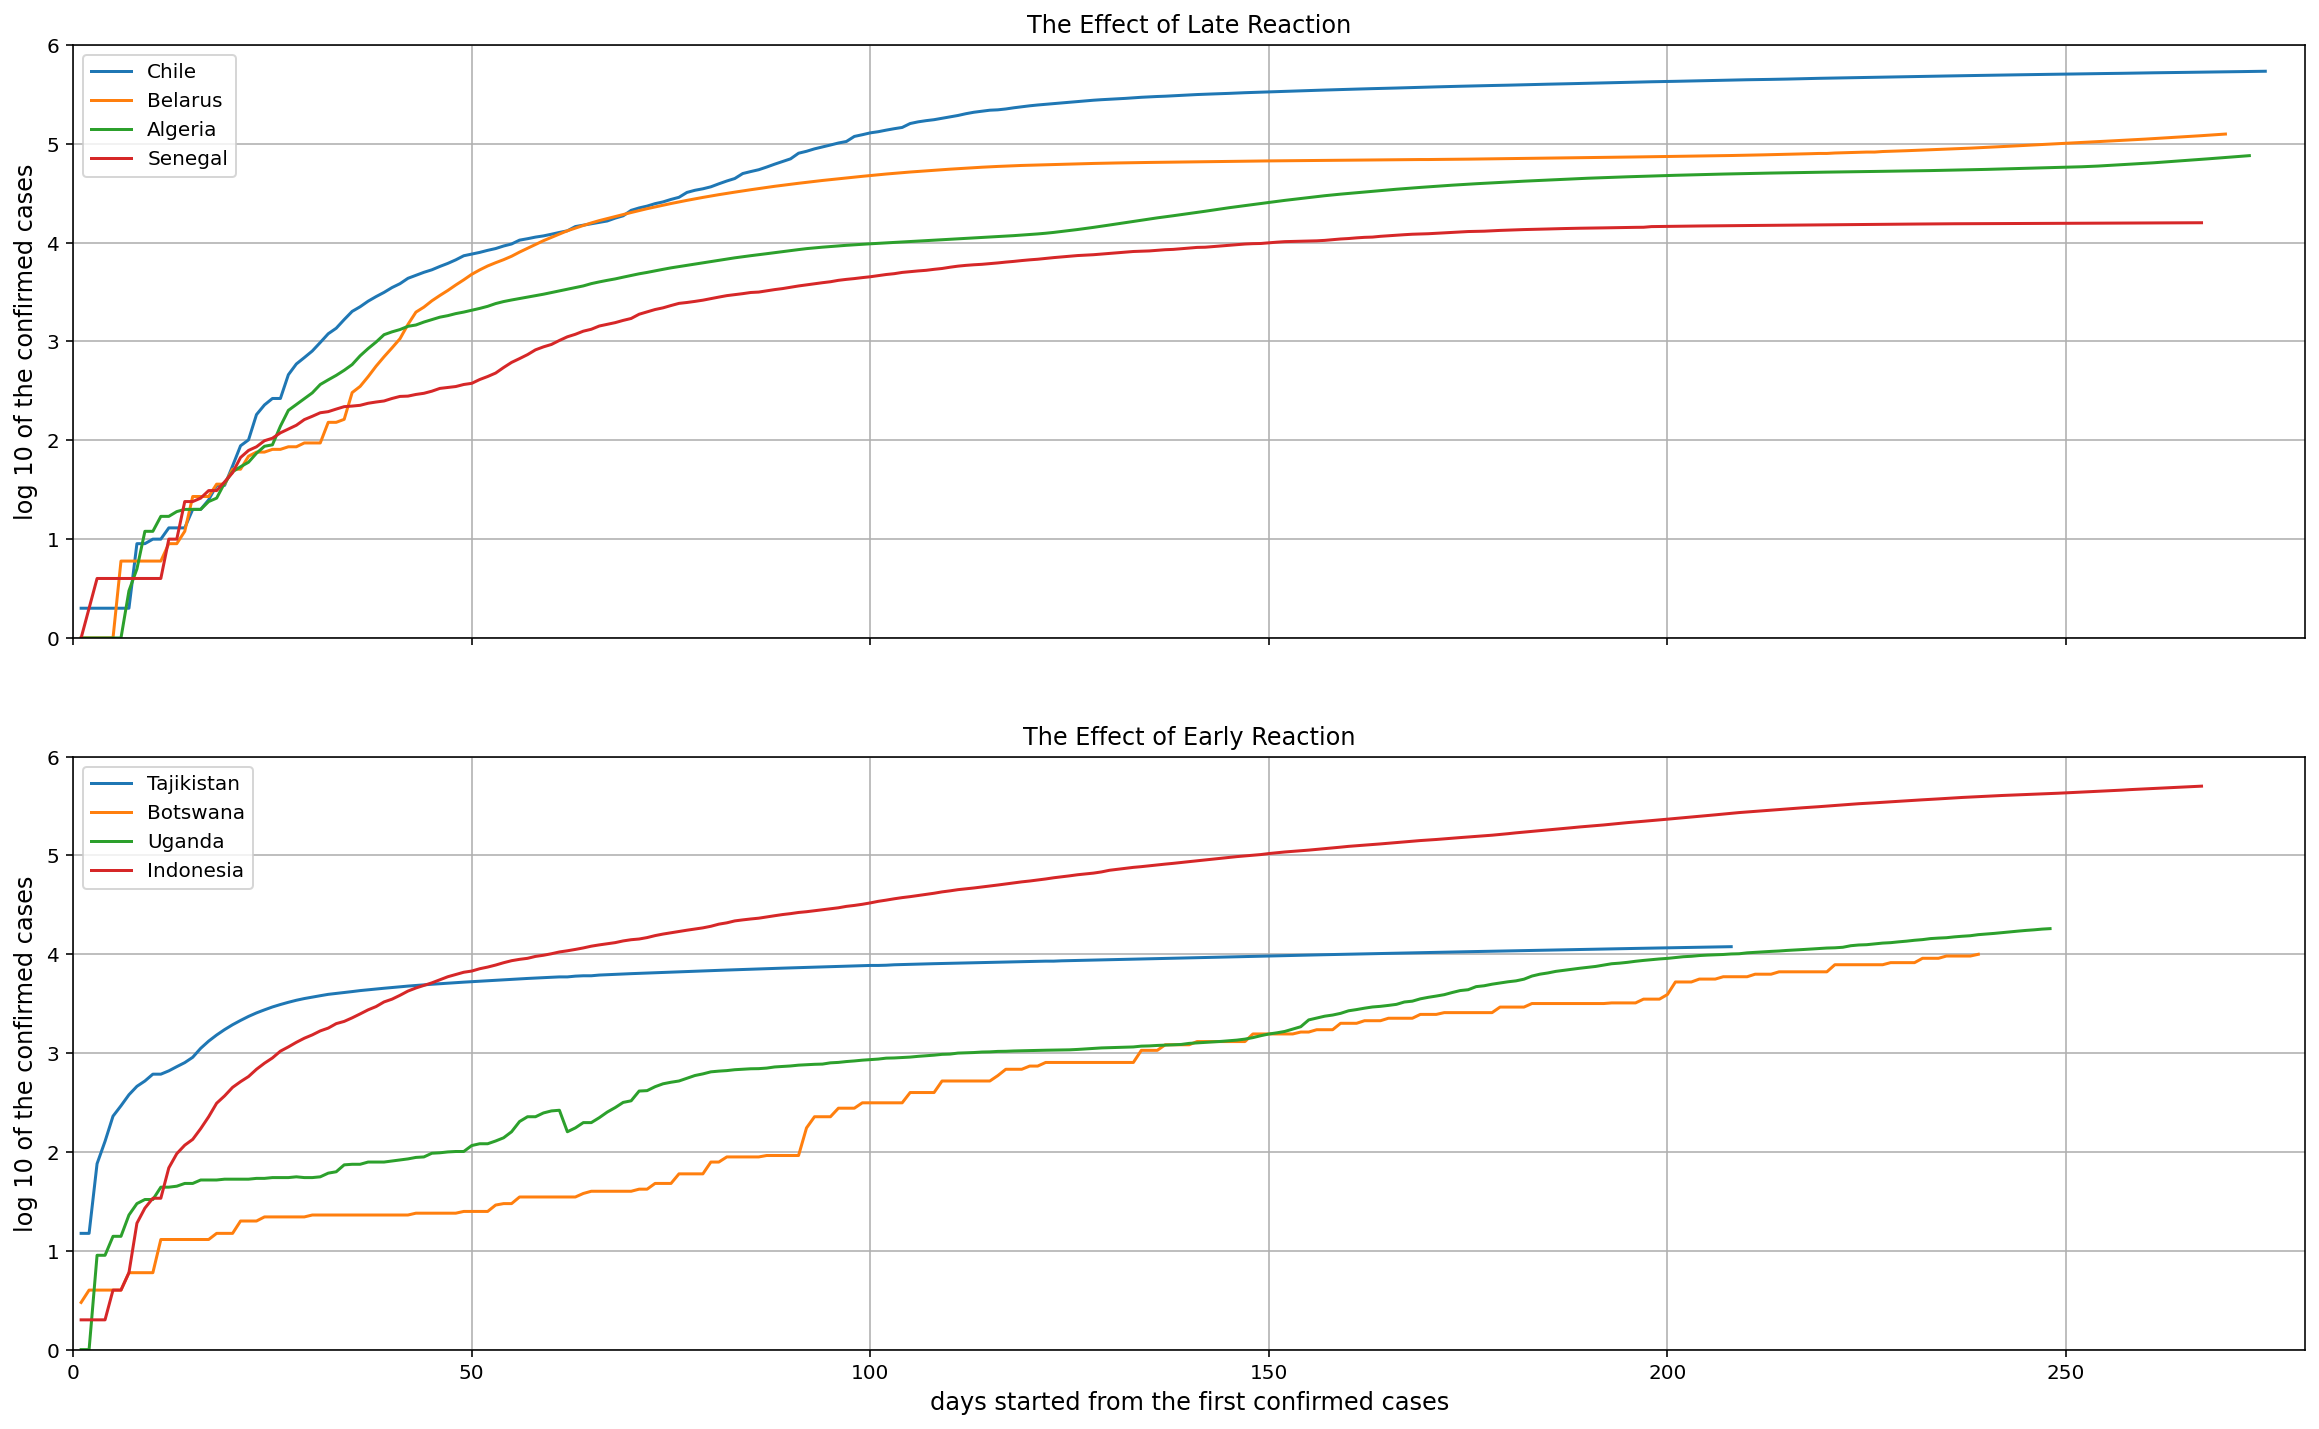

In [17]:
# 4 countries with late response

fig, ax = plt.subplots(nrows = 2,figsize = (20,12), sharex= True )

df_slice2=df_slice.iloc[:,0:307]
c1=[]
for c in df_slice2.loc['Chile']:
    if c >=1:
        c1.append(c)
        
df_slice2=df_slice.iloc[:,0:307]
c2=[]
for c in df_slice2.loc['Belarus']:
    if c >=1:
        c2.append(c)
        
df_slice2=df_slice.iloc[:,0:307]
c3=[]
for c in df_slice2.loc['Algeria']:
    if c >= 1:
        c3.append(c)

df_slice2=df_slice.iloc[:,0:307]
c4=[]
for c in df_slice2.loc['Senegal']:
    if c >= 1:
        c4.append(c)
                
        
ax[0].plot(np.arange(1,len(c1)+1),np.log10(c1), label = 'Chile')
ax[0].plot(np.arange(1,len(c2)+1),np.log10(c2),label = 'Belarus')
ax[0].plot(np.arange(1,len(c3)+1),np.log10(c3),label= 'Algeria')
ax[0].plot(np.arange(1,len(c4)+1),np.log10(c4), label = 'Senegal')

x_coordinates = [9, 9]
y_coordinates = [2, 5]
#plt.plot(x_coordinates,y_coordinates,linestyle = ':', label = 'Approximate react day')

ax[0].set_xlim(0, 280)
ax[0].set_ylim(0, 6)
ax[0].legend()
ax[0].grid()
ax[0].set_title('The Effect of Late Reaction')
ax[0].set_ylabel('log 10 of the confirmed cases',fontsize= 12)

# 4 countries with early response

df_slice2=df_slice.iloc[:,0:307]
d1=[]
for d in df_slice2.loc['Tajikistan']:
    if d >= 1:
        d1.append(d)
        
df_slice2=df_slice.iloc[:,0:307]
d2=[]
for d in df_slice2.loc['Botswana']:
    if d >= 1:
        d2.append(d)
        
df_slice2=df_slice.iloc[:,0:307]
d3=[]
for d in df_slice2.loc['Uganda']:
    if d >= 1:
        d3.append(d)

df_slice2=df_slice.iloc[:,0:307]
d4=[]
for d in df_slice2.loc['Indonesia']:
    if d >= 1:
        d4.append(d)
                
        
ax[1].plot(np.arange(1,len(d1)+1),np.log10(d1), label = 'Tajikistan')
ax[1].plot(np.arange(1,len(d2)+1),np.log10(d2),label = 'Botswana')
ax[1].plot(np.arange(1,len(d3)+1),np.log10(d3),label= 'Uganda')
ax[1].plot(np.arange(1,len(d4)+1),np.log10(d4), label = 'Indonesia')


ax[1].set_xlim(0, 280)
ax[1].set_ylim(0, 6)
ax[1].legend()
ax[1].grid()
ax[1].set_title('The Effect of Early Reaction')
ax[1].set_xlabel('days started from the first confirmed cases',fontsize= 12)
ax[1].set_ylabel('log 10 of the confirmed cases',fontsize= 12)


The early reaction countries selected took actions before the first case was confirmed in these countries. We could see that they experienced a shorter duration of the pandemic because of the late dignosis the first cases. When the COVID-19 began spreading within these countries, they could react faster and curb the trend, as given in the plot that these early reaction countries reached the inflection point of the COVID-19 epidemic in a short period of time(less than 50 days).


The late reaction countries react couples of days later after the first confirmed case. From the plot, the curve remains a straight line in the first 50 days and slow down a little bit in the next 50 days, then comes the inflection point. With this tendency, the late reaction countries endured a longer pandemic, with more confirmed cases compared to the early reaction countries.

## Growth Modeling
Take the United States as an example

In [18]:
#get the comfirmed cases data of the United States
df_slice2=df_slice.iloc[:,0:307]
df_case_us = df_slice2.loc['US']

Epoch [10000/100000], LossL:24675080.0000
Epoch [20000/100000], LossL:200686.9531
Epoch [30000/100000], LossL:34996.9023
Epoch [40000/100000], LossL:9513.3711
Epoch [50000/100000], LossL:14451.4219
Epoch [60000/100000], LossL:7191.6982
Epoch [70000/100000], LossL:8187.8057
Epoch [80000/100000], LossL:7035.0601
Epoch [90000/100000], LossL:7157.8359
Epoch [100000/100000], LossL:6752.4834


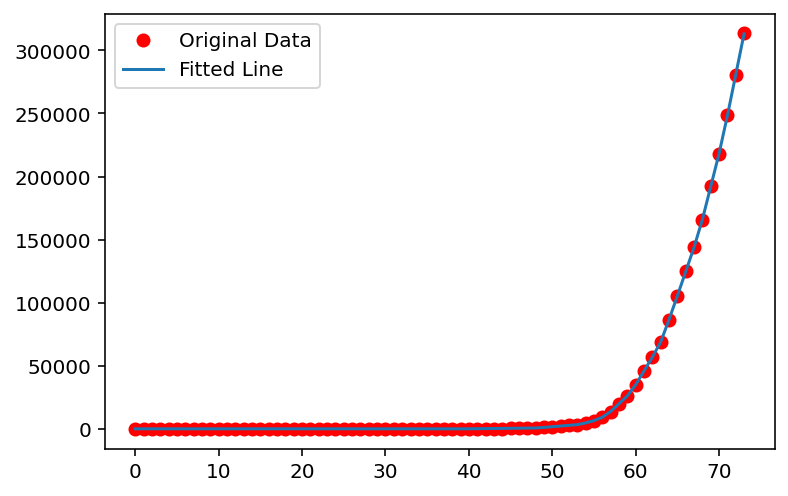

In [19]:
#data training (in this part, only the data from 1/22/20 to 4/4/20 were used for training)

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#setting parameters
input_size = 1
output_size = 1
num_epochs = 100000
learning_rate = 0.001


#building model
class MLP(nn.Module):
    def __init__(self, n_i, n_h, n_o):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(n_i, 8)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(8, 16)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(8, n_o)
        # self.relu4 = nn.ReLU()
        # self.linear5 = nn.Linear(32, n_o)

    def forward(self, input):
        x = self.relu1(self.linear1(input))
        x = self.relu2(self.linear2(x))

        x = self.relu3(self.linear3(x))
        # x = self.relu4(self.linear4(x))
        x = self.linear4(x)
        return x

# data
x_train =  list(range(74))
x_train = sorted(x_train)
y_train =  df_case_us[0:74]

x_train_list =[]
y_train_list =[]
for x in x_train:
    x_train_list.append([x])
for y in y_train:
    y_train_list.append([y])
    
x_train = np.array(x_train_list,dtype=np.float32)
y_train = np.array(y_train_list,dtype=np.float32)


#training

model = MLP(1, 64, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10000 == 0:
        print("Epoch [{}/{}], LossL:{:.4f}".format(epoch + 1, num_epochs, loss.item()))

predicted = model(torch.from_numpy(x_train)).detach().numpy()

#print(y_train)
#print(predicted)

plt.plot(x_train, y_train, 'ro', label='Original Data')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()

#save the model
torch.save(model.state_dict(), 'model.ckpt')

In [20]:
#model

class MLP(nn.Module):
    def __init__(self, n_i, n_h, n_o):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(n_i, 8)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(8, 16)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(8, n_o)
        # self.relu4 = nn.ReLU()
        # self.linear5 = nn.Linear(32, n_o)

    def forward(self, input):
        x = self.relu1(self.linear1(input))
        x = self.relu2(self.linear2(x))

        x = self.relu3(self.linear3(x))
        # x = self.relu4(self.linear4(x))
        x = self.linear4(x)
        return x
model = MLP(1, 64, 1)
model.load_state_dict(torch.load('model.ckpt'))
model.eval()


x = []
for i in range(307):
    x.append([i])
x = np.array(x,dtype=np.float32)
x = torch.from_numpy(x)

y = model(x).detach().numpy().tolist()

Text(0, 0.5, 'total cases')

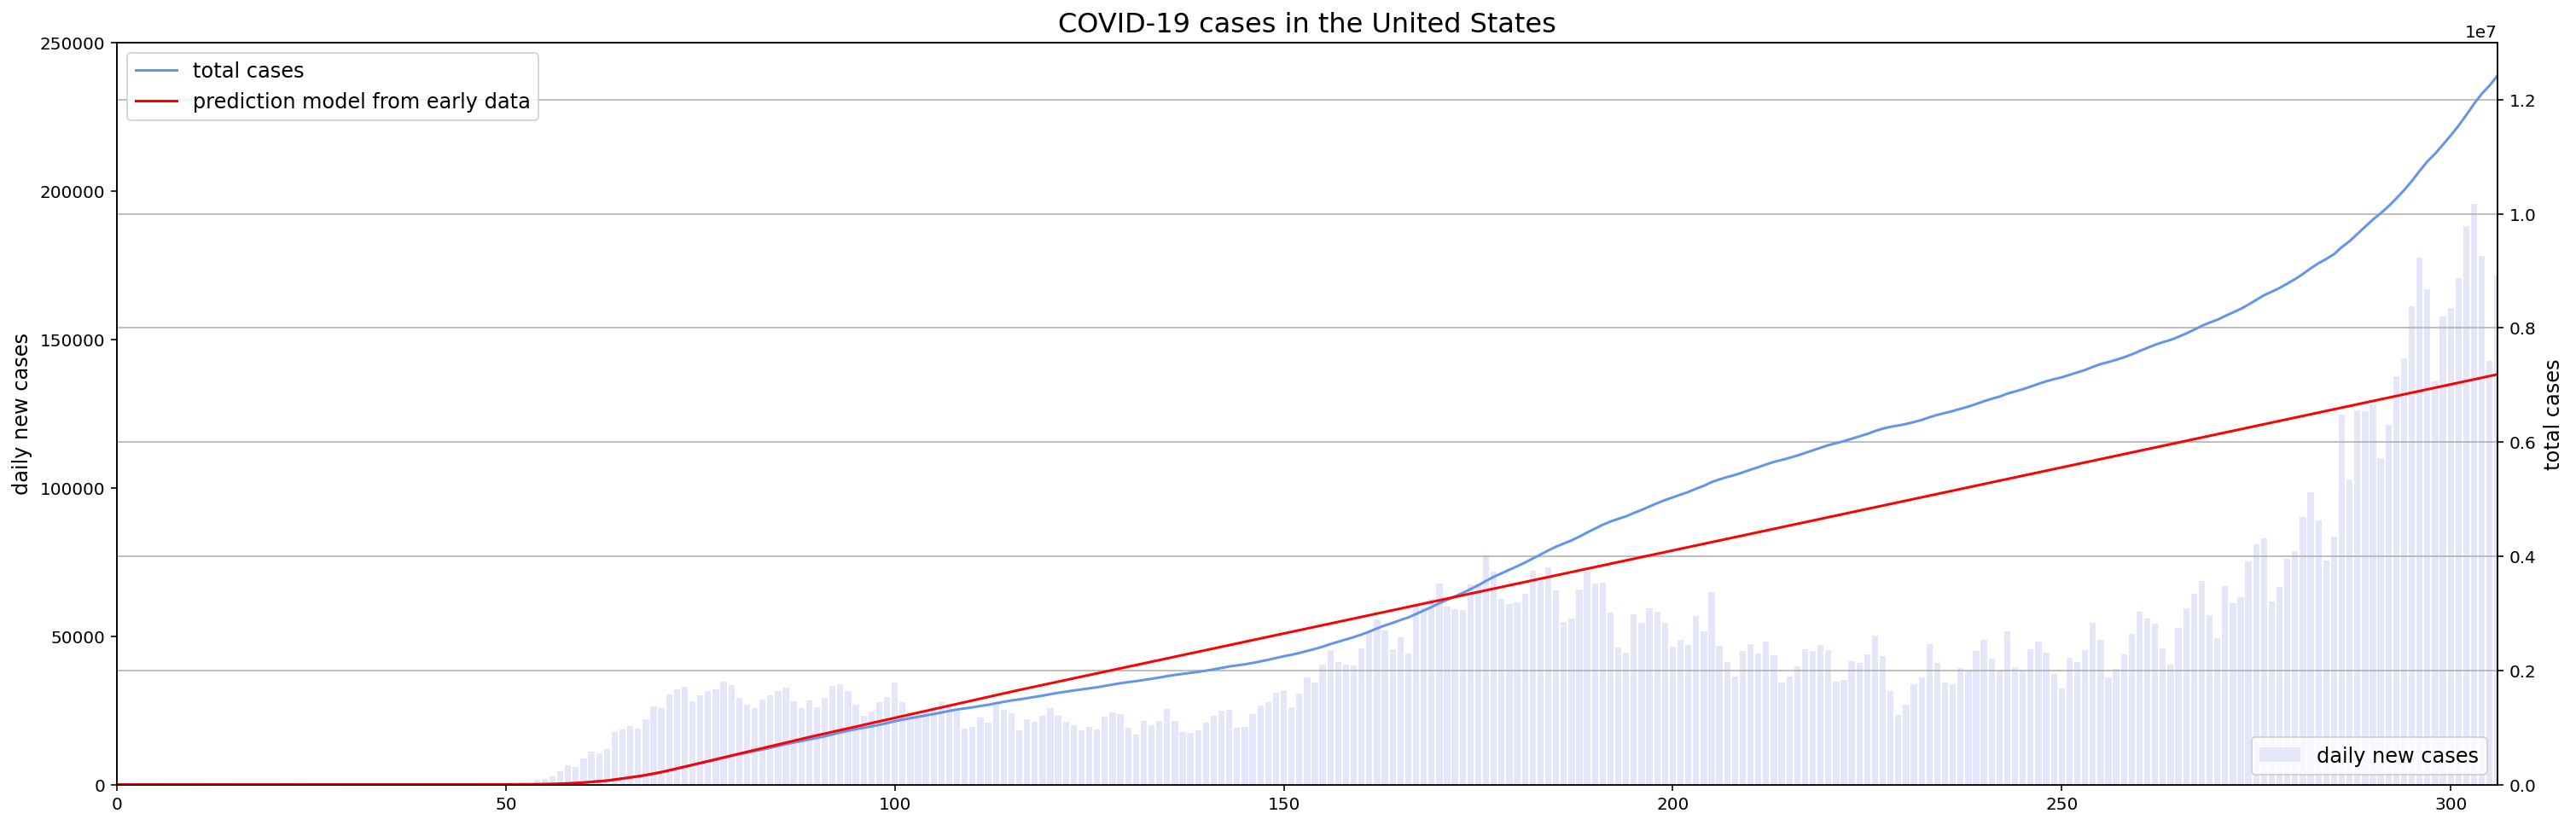

In [32]:
import datetime as datetime
fig,ax1 =plt.subplots(figsize = (25,8))

#extract the daily confirmed cases data into a list       
e1=[1]
for i in range(1,307):
    e1.append(df_case_us[i]-df_case_us[i-1])

dt = list(range(307))
#plot the daily cases
ax1.bar(dt, e1, color = 'lavender', label = 'daily new cases') 
ax1.set_ylim(0,250000)
ax1.set_ylabel('daily new cases',fontsize= 12)
ax1.legend(loc='lower right',fontsize= 12)

#plot the accumulative cases
ax2=ax1.twinx()    
ax2.plot(dt,df_case_us,color = 'cornflowerblue', label = 'total cases') 
ax2.grid()
ax2.set_ylim(0,13000000)
ax2.set_xlim(0,306)
ax2.set_title('COVID-19 cases in the United States',fontsize= 16)
ax2.plot(x,y,color='r',label = 'prediction model from early data')
ax2.legend(fontsize= 12)
ax2.set_xlabel('days',fontsize= 12)
ax2.set_ylabel('total cases',fontsize= 12)

The policies were in effect between March  and April. From the predicted line, we could tell that the policies were effective over a period of time as the total cases went beneath the predicted line. But in August and November, US endured the second and third outbreak, which results in the climbing of the confirmed cases.

## The Effect of Different Policies
Take the United States as an example

The policy value indicates the stingency of the policies, with 1.0 as loose policies and 4.0 as stringent policies.
the flag column in the dataframe indicates whether this policy targets at a specific region(0.0) or is a general policy around the country(1.0)

In [33]:
#get the policy data of the United States
df_us = df_policy.groupby('Country/Region').get_group('United States')
df_us.head(5)

Country/Region CountryCode  StartDate    EndDate  \
7059  United States         USA 2020-01-21        NaT   
7060  United States         USA 2020-02-02 2020-03-01   
7061  United States         USA 2020-02-28 2020-03-03   
7062  United States         USA 2020-03-01 2020-03-11   
7063  United States         USA 2020-03-02        NaT   

                             PolicyType  PolicyValue  Flag  \
7059                H3: Contact tracing          1.0   NaN   
7060  C8: International travel controls          2.0   NaN   
7061                 H2: Testing policy          1.0   NaN   
7062           C3: Cancel public events          1.0   0.0   
7063  C8: International travel controls          3.0   NaN   

                                            InitialNote  
7059  "Contact tracing was used in Seattle and parts...  
7060  Starting Sunday, passengers flying to the U.S....  
7061  Some testing was carried out before this, but ...  
7062  CDC upgrades it's warning to level 3, meaning ...  
7063  As of March 2, foreign nationals who have trav...

In [39]:
date= date[0:307]

Text(0, 0.5, 'daily new cases')

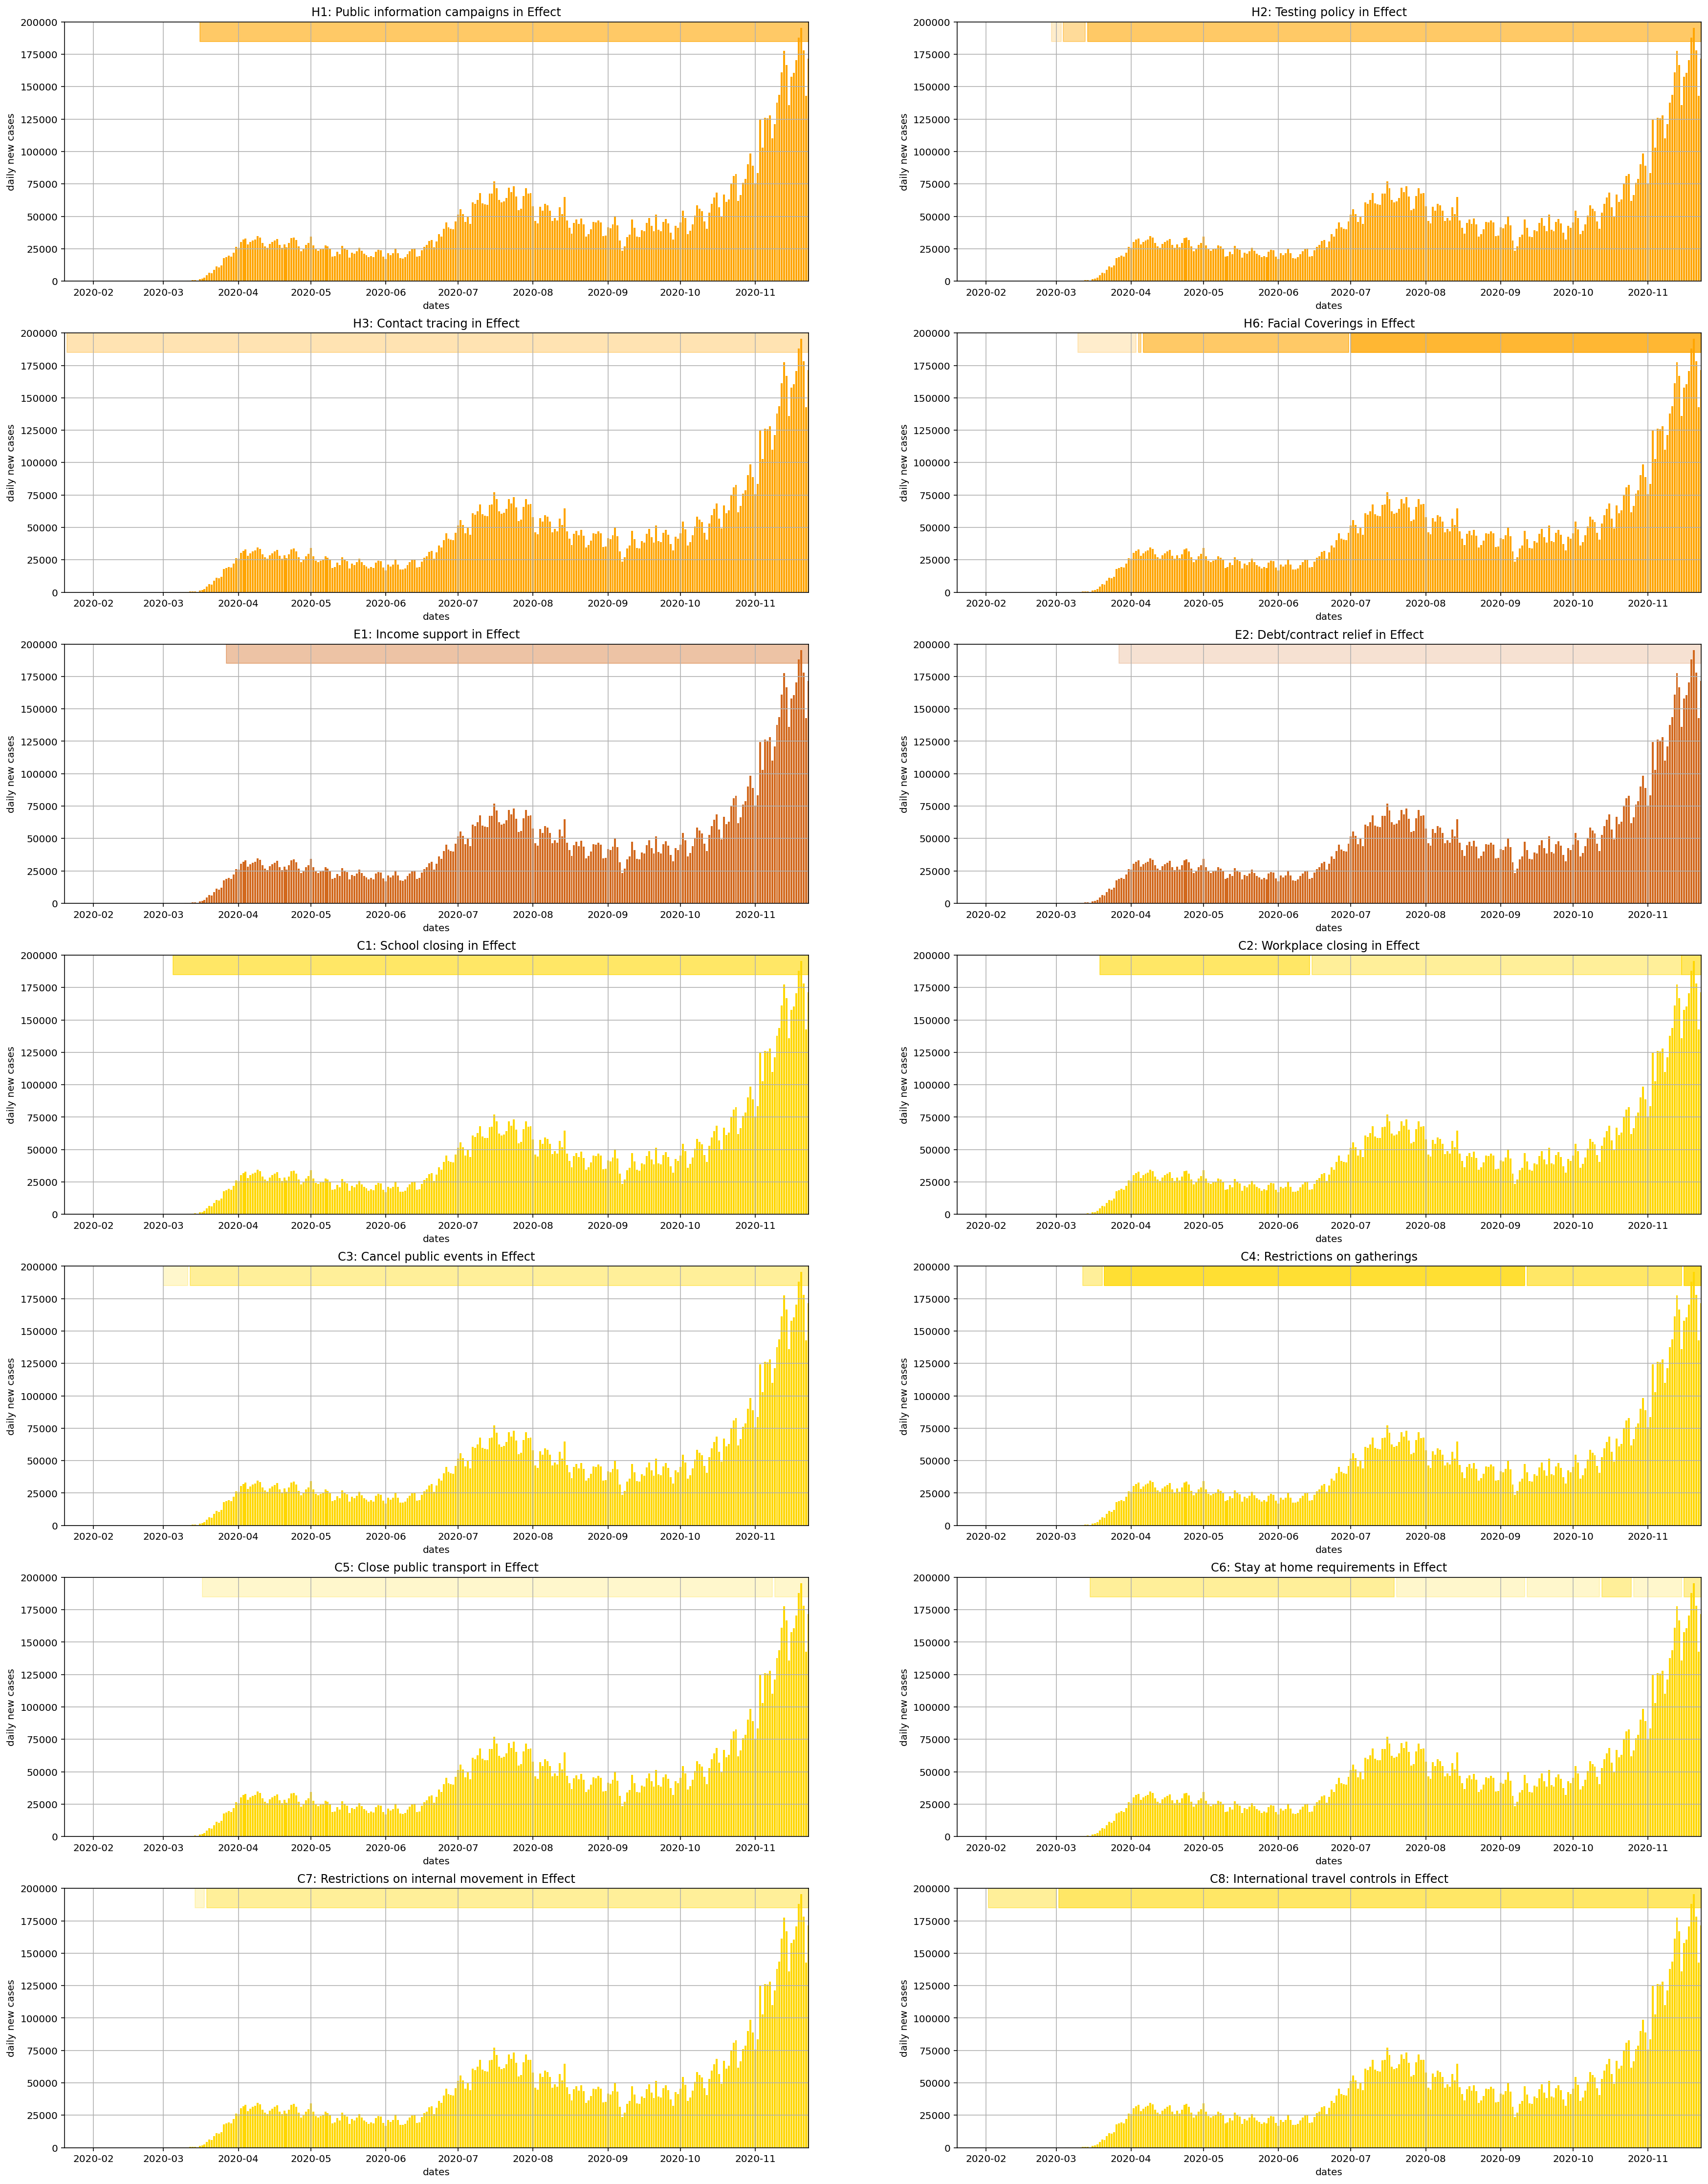

In [40]:
# health system poliies
fig, ax =plt.subplots(nrows = 7, ncols=2, figsize =(30,40))

datelist00 = pd.date_range(start = '2020-03-16',end='2020-11-23')
ax[0,0].fill_between(datelist00,185000,200000, color = 'orange', alpha = 0.6)


ax[0,0].bar(date, e1, color = 'orange') 
ax[0,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[0,0].set_ylim(0, 200000)
ax[0,0].grid()
ax[0,0].set_title('H1: Public information campaigns in Effect')
ax[0,0].set_xlabel('dates')
ax[0,0].set_ylabel('daily new cases')

datelist011 = pd.date_range(start = '2020-02-28',end='2020-03-03')
datelist012 = pd.date_range(start = '2020-03-04',end='2020-03-13')
datelist013 = pd.date_range(start = '2020-03-14',end='2020-11-23')
ax[0,1].fill_between(datelist011, 185000,200000, color = 'orange', alpha = 0.2)
ax[0,1].fill_between(datelist012, 185000,200000, color = 'orange', alpha = 0.4)
ax[0,1].fill_between(datelist013, 185000,200000, color = 'orange', alpha = 0.6)

ax[0,1].bar(date, e1, color = 'orange') 
ax[0,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[0,1].set_ylim(0, 200000)
ax[0,1].grid()
ax[0,1].set_title('H2: Testing policy in Effect')
ax[0,1].set_xlabel('dates')
ax[0,1].set_ylabel('daily new cases')


datelist021 = pd.date_range(start = '2020-01-21',end='2020-11-23')
ax[1,0].fill_between(datelist021, 185000,200000, color = 'orange', alpha = 0.3)
ax[1,0].bar(date, e1, color = 'orange') 
ax[1,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[1,0].set_ylim(0, 200000)
ax[1,0].grid()
ax[1,0].set_title('H3: Contact tracing in Effect')
ax[1,0].set_xlabel('dates')
ax[1,0].set_ylabel('daily new cases')

datelist031 = pd.date_range(start = '2020-03-10',end='2020-04-03')
datelist032 = pd.date_range(start = '2020-04-04',end='2020-04-05')
datelist033 = pd.date_range(start = '2020-04-06',end='2020-06-30')
datelist034 = pd.date_range(start = '2020-07-1',end='2020-11-23')
ax[1,1].fill_between(datelist031, 185000,200000, color = 'orange', alpha = 0.2)
ax[1,1].fill_between(datelist032, 185000,200000, color = 'orange', alpha = 0.4)
ax[1,1].fill_between(datelist033, 185000,200000, color = 'orange', alpha = 0.6)
ax[1,1].fill_between(datelist034, 185000,200000, color = 'orange', alpha = 0.8)

ax[1,1].bar(date, e1, color = 'orange') 
ax[1,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[1,1].set_ylim(0, 200000)
ax[1,1].grid()
ax[1,1].set_title('H6: Facial Coverings in Effect')
ax[1,1].set_xlabel('dates')
ax[1,1].set_ylabel('daily new cases')

#economy policies

datelist11 = pd.date_range(start = '2020-03-27',end='2020-11-23')
ax[2,0].fill_between(datelist11, 185000,200000, color = 'chocolate', alpha = 0.4)

ax[2,0].bar(date, e1, color = 'chocolate') 
ax[2,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[2,0].set_ylim(0, 200000)
ax[2,0].grid()
ax[2,0].set_title('E1: Income support in Effect')
ax[2,0].set_xlabel('dates')
ax[2,0].set_ylabel('daily new cases')

ax[2,1].fill_between(datelist11, 185000,200000, color = 'chocolate', alpha = 0.2)

ax[2,1].bar(date, e1, color = 'chocolate') 
ax[2,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[2,1].set_ylim(0, 200000)
ax[2,1].grid()
ax[2,1].set_title('E2: Debt/contract relief in Effect')
ax[2,1].set_xlabel('dates')
ax[2,1].set_ylabel('daily new cases')



#containment and closure policies

datelist210 = pd.date_range(start = '2020-03-05',end='2020-11-23')
ax[3,0].fill_between(datelist210, 185000,200000, color = 'gold', alpha = 0.6)


ax[3,0].bar(date, e1, color = 'gold') 
ax[3,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[3,0].set_ylim(0, 200000)
ax[3,0].grid()
ax[3,0].set_title('C1: School closing in Effect')
ax[3,0].set_xlabel('dates')
ax[3,0].set_ylabel('daily new cases')


datelist220 = pd.date_range(start = '2020-03-19',end='2020-06-14')
datelist221 = pd.date_range(start = '2020-06-15',end='2020-11-15')
datelist222 = pd.date_range(start = '2020-11-15',end='2020-11-23')
ax[3,1].fill_between(datelist220, 185000,200000, color = 'gold', alpha = 0.6)
ax[3,1].fill_between(datelist221, 185000,200000, color = 'gold', alpha = 0.4)
ax[3,1].fill_between(datelist222, 185000,200000, color = 'gold', alpha = 0.6)

ax[3,1].bar(date, e1, color = 'gold') 
ax[3,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[3,1].set_ylim(0, 200000)
ax[3,1].grid()
ax[3,1].set_title('C2: Workplace closing in Effect')
ax[3,1].set_xlabel('dates')
ax[3,1].set_ylabel('daily new cases')


datelist230 = pd.date_range(start = '2020-03-01',end='2020-03-11')
datelist231 = pd.date_range(start = '2020-03-12',end='2020-11-23')
ax[4,0].fill_between(datelist230, 185000,200000, color = 'gold', alpha = 0.2)
ax[4,0].fill_between(datelist231, 185000,200000, color = 'gold', alpha = 0.4)

ax[4,0].bar(date, e1, color = 'gold') 
ax[4,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[4,0].set_ylim(0, 200000)
ax[4,0].grid()
ax[4,0].set_title('C3: Cancel public events in Effect')
ax[4,0].set_xlabel('dates')
ax[4,0].set_ylabel('daily new cases')

datelist240 = pd.date_range(start = '2020-03-12',end='2020-03-20')
datelist241 = pd.date_range(start = '2020-03-21',end='2020-09-11')
datelist242 = pd.date_range(start = '2020-09-12',end='2020-11-15')
datelist243 = pd.date_range(start = '2020-11-16',end='2020-11-23')
ax[4,1].fill_between(datelist240, 185000,200000, color = 'gold', alpha = 0.4)
ax[4,1].fill_between(datelist241, 185000,200000, color = 'gold', alpha = 0.8)
ax[4,1].fill_between(datelist242, 185000,200000, color = 'gold', alpha = 0.6)
ax[4,1].fill_between(datelist243, 185000,200000, color = 'gold', alpha = 0.8)

ax[4,1].bar(date, e1, color = 'gold') 
ax[4,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[4,1].set_ylim(0, 200000)
ax[4,1].grid()
ax[4,1].set_title('C4: Restrictions on gatherings')
ax[4,1].set_xlabel('dates')
ax[4,1].set_ylabel('daily new cases')


datelist250 = pd.date_range(start = '2020-03-17',end='2020-11-08')
datelist251 = pd.date_range(start = '2020-11-09',end='2020-11-23')
ax[5,0].fill_between(datelist250, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,0].fill_between(datelist251, 185000,200000, color = 'gold', alpha = 0.2)

ax[5,0].bar(date, e1, color = 'gold') 
ax[5,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[5,0].set_ylim(0, 200000)
ax[5,0].grid()
ax[5,0].set_title('C5: Close public transport in Effect')
ax[5,0].set_xlabel('dates')
ax[5,0].set_ylabel('daily new cases')



datelist260 = pd.date_range(start = '2020-03-15',end='2020-07-19')
datelist261 = pd.date_range(start = '2020-07-20',end='2020-09-11')
datelist262 = pd.date_range(start = '2020-09-12',end='2020-10-12')
datelist263 = pd.date_range(start = '2020-10-13',end='2020-10-25')
datelist264 = pd.date_range(start = '2020-10-26',end='2020-11-15')
datelist265 = pd.date_range(start = '2020-11-16',end='2020-11-23')
ax[5,1].fill_between(datelist260, 185000,200000, color = 'gold', alpha = 0.4)
ax[5,1].fill_between(datelist261, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist262, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist263, 185000,200000, color = 'gold', alpha = 0.4)
ax[5,1].fill_between(datelist264, 185000,200000, color = 'gold', alpha = 0.2)
ax[5,1].fill_between(datelist265, 185000,200000, color = 'gold', alpha = 0.4)

ax[5,1].bar(date, e1, color = 'gold') 
ax[5,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[5,1].set_ylim(0, 200000)
ax[5,1].grid()
ax[5,1].set_title('C6: Stay at home requirements in Effect')
ax[5,1].set_xlabel('dates')
ax[5,1].set_ylabel('daily new cases')


datelist270 = pd.date_range(start = '2020-03-14',end='2020-03-18')
datelist271 = pd.date_range(start = '2020-03-19',end='2020-11-23')
ax[6,0].fill_between(datelist270, 185000,200000, color = 'gold', alpha = 0.2)
ax[6,0].fill_between(datelist271, 185000,200000, color = 'gold', alpha = 0.4)

ax[6,0].bar(date, e1, color = 'gold') 
ax[6,0].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[6,0].set_ylim(0, 200000)
ax[6,0].grid()
ax[6,0].set_title('C7: Restrictions on internal movement in Effect')
ax[6,0].set_xlabel('dates')
ax[6,0].set_ylabel('daily new cases')

datelist280 = pd.date_range(start = '2020-02-02',end='2020-03-01')
datelist281 = pd.date_range(start = '2020-03-02',end='2020-11-23')
ax[6,1].fill_between(datelist280, 185000,200000, color = 'gold', alpha = 0.4)
ax[6,1].fill_between(datelist281, 185000,200000, color = 'gold', alpha = 0.6)

ax[6,1].bar(date, e1, color = 'gold') 
ax[6,1].set_xlim(datetime.date(2020, 1, 20), datetime.date(2020,11,23))
ax[6,1].set_ylim(0, 200000)
ax[6,1].grid()
ax[6,1].set_title('C8: International travel controls in Effect')
ax[6,1].set_xlabel('dates')
ax[6,1].set_ylabel('daily new cases')

We could tell that the government placed much emphasis on some of the policies, an example of which is the H6. From the plot, we could conclude that everytime the facial covering policy became more stingent, a decline in daily new cases could be pointed out. The outbreak might be partly due to people did not take this as serious as the beginning and did not follow the rules. Also, we could see that the government was getting loose on some of the policies, like C6. The government lower the constraints of stay at home requirement in July, which was then welcomed the second outbread in August. Hopefully, in face of the third outbreak, we noticed that the government is reinforcing some policies, like C4, C6. I wish we could all overcome this hard period and bring everything back to normal soon.